# News Crawler

In [2]:
filename = 'news_ndtv.csv'
headr = ['title','date','time','article','location','tags']

In [3]:
import csv

In [6]:
import requests
from bs4 import BeautifulSoup

## Scraping World, India and City News

In [7]:
URLS = ["https://www.ndtv.com/world","https://www.ndtv.com/india","https://www.ndtv.com/cities"]

In [9]:
for u in URLS:
    #Since only 14 pages exist at the maximum on the website
    for i in range (14):
        URL = "".join(u+'/page-'+str(i+1))
        R = requests.get(URL)
        SOUP = BeautifulSoup(R.content)
        story_div = SOUP.findAll('div',{'class':'new_storylising_img'})
    
        for ix in story_div:
            url = ix.a.attrs['href']
            r = requests.get(url)
            soup = BeautifulSoup(r.content)
    
            #Get all the information
            h = soup.h1.text
    
            dt = soup.find('span',itemprop="dateModified").text
            d =dt.split(" ")[1:4]
            d = " ".join(d)
            t = dt.split(" ")[4:7]
            t = " ".join(t)

            article = soup.find('div',{'class':'sp-ttl-wrp'})
            article = soup.findAll('p')
            article = article[1:-4]
            at=""
            for i in article:
                at+=i.text

            b = soup.find('b',{'class':'place_cont'})
            if b:
                b = b.text
                loc = b[:-2]
            else:
                loc = 'None'

            tgs = soup.findAll('a',{'class':'tg_lk'})
            tags_list = []
            for tg in tgs:
                tags_list.append(tg.text)    
            tags_list = ",".join(str(il) for il in tags_list)

            dictionary={'title':h,'date':d,'time':t,'article':at,'location':loc,'tags':tags_list}

            with open (filename,'a',encoding='utf-8') as f:
                writer = csv.DictWriter(f, fieldnames = headr) 
                writer.writerow(dictionary) 

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv("news_ndtv.csv")
df.to_csv("news_ndtv.csv",header=headr,index=False)

In [12]:
data =  pd.read_csv("news_ndtv.csv")
data.head()

,title,date,time,article,location,tags
0,"India, US Sign Statement Of Intent To Strengt...","September 16, 2020",1:59 am IST,India and the United States on Tuesday signed ...,Washington,"India US relations,Defence Tech Cooperation"
1,"""Lost His Mental Stability"": Kerala Chief Min...","September 16, 2020",1:38 am IST,Kerala Chief Minister Pinarayi Vijayan on Tues...,Thiruvananthapuram,"Pinarayi Vijayan,K Surendran"
2,Ordered Probe Into Army Veteran's Assault In ...,"September 16, 2020",1:24 am IST,Maharashtra Home Minister Anil Deshmukh on Tue...,Mumbai (Maharashtra),"Anil Deshmukh,Maharashtra"
3,UK Restores 3 Idols Stolen From Tamil Nadu Te...,"September 16, 2020",1:20 am IST,"A set of three idols of Lord Rama, Sita and La...",London,"Tamil Nadu,UK"
4,"""Where Is Prime Minister?"" Congress Attacks C...","September 16, 2020",1:13 am IST,Members of the Congress walked out of the Lok ...,New Delhi,"Congress,Parliament,Narendra Modi"


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     399 non-null    object
 1   date      399 non-null    object
 2   time      399 non-null    object
 3   article   399 non-null    object
 4   location  399 non-null    object
 5   tags      397 non-null    object
dtypes: object(6)
memory usage: 18.8+ KB


# Exploratory Data Analysis

In [14]:
import numpy as np
import matplotlib.pyplot as plt

## Topic Modelling- using LDA and generating word cloud 

In [15]:
import re

data_new = data

#Remove punctuation
data_new['title_processed'] = data_new['title'].map(lambda x:re.sub('[,\.!?]','',x))

#Convert title to lowercase
data_new['title_processed'] = data_new['title_processed'].map(lambda x:x.lower())


In [16]:
data_new.head()

,title,date,time,article,location,tags,title_processed
0,"India, US Sign Statement Of Intent To Strengt...","September 16, 2020",1:59 am IST,India and the United States on Tuesday signed ...,Washington,"India US relations,Defence Tech Cooperation",india us sign statement of intent to strength...
1,"""Lost His Mental Stability"": Kerala Chief Min...","September 16, 2020",1:38 am IST,Kerala Chief Minister Pinarayi Vijayan on Tues...,Thiruvananthapuram,"Pinarayi Vijayan,K Surendran","""lost his mental stability"": kerala chief min..."
2,Ordered Probe Into Army Veteran's Assault In ...,"September 16, 2020",1:24 am IST,Maharashtra Home Minister Anil Deshmukh on Tue...,Mumbai (Maharashtra),"Anil Deshmukh,Maharashtra",ordered probe into army veteran's assault in ...
3,UK Restores 3 Idols Stolen From Tamil Nadu Te...,"September 16, 2020",1:20 am IST,"A set of three idols of Lord Rama, Sita and La...",London,"Tamil Nadu,UK",uk restores 3 idols stolen from tamil nadu te...
4,"""Where Is Prime Minister?"" Congress Attacks C...","September 16, 2020",1:13 am IST,Members of the Congress walked out of the Lok ...,New Delhi,"Congress,Parliament,Narendra Modi","""where is prime minister"" congress attacks ce..."


In [17]:
data_new.drop(columns='title',inplace=True)

In [18]:
from wordcloud import WordCloud

In [19]:
#Join titles together
all_news_titles = ','.join(list(data_new['title_processed'].values))

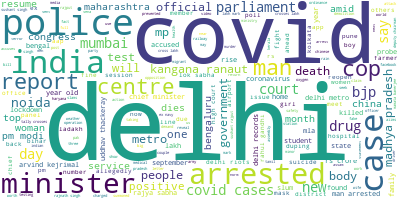

In [20]:
wcloud = WordCloud(background_color='white',max_words=200,
                   contour_width=3,contour_color='steelblue')

wcloud.generate(all_news_titles)
wcloud.to_image()

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [22]:
count_vec = CountVectorizer(stop_words='english')
counts = count_vec.fit_transform(data_new['title_processed'])

In [23]:
#Visualizing the 10 most common words
#helper func
def plot_top_words(counts,count_vec):
    words = count_vec.get_feature_names()
    total_cnt = np.zeros(len(words))
    for t in counts:
        total_cnt+=t.toarray()[0]
        
    count_dict = (zip(words,total_cnt))
    count_dict = sorted(count_dict,key= lambda x:x[1],reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))
    
    plt.figure(2,figsize=(15,8))
    plt.subplot(title='10 most common words')
    sns.set_context('notebook',font_scale=1.25,rc={'lines.linewidth':2.5})
    sns.barplot(x_pos,counts,palette='husl')
    plt.xticks(x_pos,words,rotation=90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

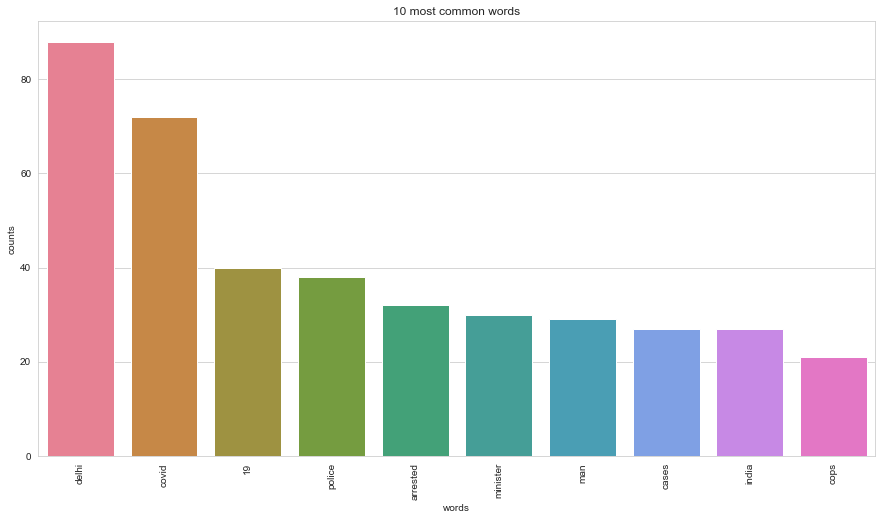

In [24]:
plot_top_words(counts,count_vec)

In [25]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [26]:
def print_topics(model,count_vec,n_top_words):
    words = count_vec.get_feature_names()
    for ix,topic in enumerate(model.components_):
        print("\nTopic #%d"%ix)
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words-1:-1]]))

In [27]:
number_topics = 10
number_words = 4

In [28]:
lda = LDA(n_components=number_topics,n_jobs=-1)
lda.fit(counts)

LatentDirichletAllocation(n_jobs=-1)

In [29]:
print("Topics found via LDA:")
print_topics(lda,count_vec,number_words)

Topics found via LDA:

Topic #0
centre covid court delhi

Topic #1
delhi parliament metro court

Topic #2
india arrested delhi pm

Topic #3
covid police tests positive

Topic #4
delhi covid 19 cases

Topic #5
arrested covid singh parliament

Topic #6
minister delhi kangana ranaut

Topic #7
delhi chief covid minister

Topic #8
covid case delhi police

Topic #9
police man uddhav thackeray


### Word Count for every article

In [30]:
word_count = []
for i in data.article:
    cnt=len(i.split())
    word_count.append(cnt)

In [31]:
len(word_count)

399

In [32]:
max(word_count)

2282

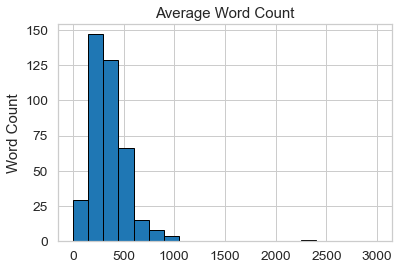

In [33]:
# Average Word Count in the news articles
plt.title("Average Word Count")
plt.hist(word_count,20,range=(0,3000),edgecolor='black')
plt.ylabel("Word Count")
plt.show()

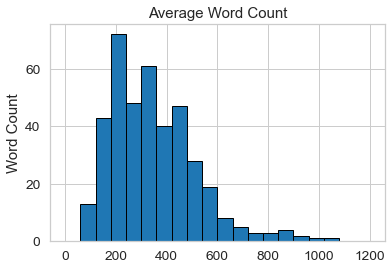

In [34]:
plt.title("Average Word Count")
plt.hist(word_count,20,range=(0,1200),edgecolor='black')
plt.ylabel("Word Count")
plt.show()

In [35]:
word_count= np.asarray(word_count)
avg = np.sum(word_count)/len(word_count)

In [36]:
print('Average Word Count: '+ str(int(avg)))

Average Word Count: 352


### Latest tags

In [37]:
df_new = data[data['tags'].notnull()]

In [38]:
# Creating a dictionary of tags
tags={}

for ix in df_new.tags:
    tags_single_art=ix.split(',')
    for t in tags_single_art:
        if t in tags:
            tags[t]+=1
        else:
            tags[t]=1  

In [39]:
#tags

In [40]:
tags_latest = sorted(tags,key=tags.get,reverse=True)

In [41]:
for t in tags_latest[:10]:
    print(t,tags[t])

Coronavirus 37
Delhi 24
Parliament 15
Madhya Pradesh 13
Kangana Ranaut 11
COVID-19 11
coronavirus 10
Arvind Kejriwal 9
Narendra Modi 8
Mumbai 8


### Frequent Posting Times

In [42]:
times = data['time']

In [43]:
times_hrs=[]
for i in times:
    time_0=i
    time_0=time_0.split()
    hr=time_0[0].split(":")[0]
    hr=int(hr)
    if time_0[1]=='pm':
        hr+=12       
    times_hrs.append(hr)

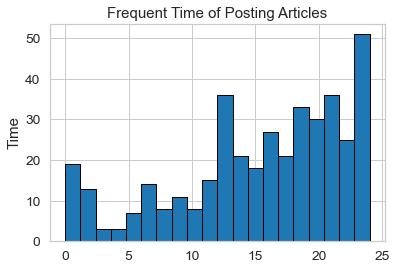

In [44]:
plt.title("Frequent Time of Posting Articles")
plt.hist(times_hrs,20,range=(0,24),edgecolor='black')
plt.ylabel("Time")
plt.show()

### Most Reported Locations

In [45]:
locations = data[data['location'].notnull()]
locations = locations['location']

In [46]:
places={}
for l in locations:
    loc = l
    if loc in places:
        places[loc]+=1
    else:
        places[loc]=1    

In [47]:
#places

In [48]:
top_places = sorted(places,key=places.get,reverse=True)

In [49]:
#top_places

In [50]:
for p in top_places[:20]:
    print(p,places[p])

New Delhi 200
Mumbai 46
Bengaluru 13
Kolkata 13
None 12
Noida 12
Chandigarh 10
Guwahati 6
Bhopal 6
Patna 5
Pune 5
Lucknow 4
Washington 3
Thiruvananthapuram 3
Srinagar 3
Surat 3
Bhubaneswar 3
Raipur 2
Hyderabad 2
New York 2
